## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [2]:
# Your code here - remember to use markdown cells for comments as well!
# Student name: Brian O'Donnell
# Student pace: Flex-Part Time
# Scheduled project review date/time: 12 January 2022
# Instructor name: Abhineet Kulkarni
# Blog post URL:

In [3]:
# Factors taken into consideration:
    #ROI, Genre, distribution, actor/director, season, run time, overall budget

In [25]:
i_title = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_1/Phase_1_Project/dsc-phase-1-project-v2-3/zippedData/imdb.title.basics.csv.gz')
i_title.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.00,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.00,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.00,"Comedy,Drama,Fantasy"


In [15]:
i_ratings = pd.read_csv('/Users/natashawyatt/Documents/Flatiron_school/Phase_1/Phase_1_Project/dsc-phase-1-project-v2-3/zippedData/imdb.title.ratings.csv.gz')
i_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [16]:
i_ratings.shape

(73856, 3)

In [17]:
i_ratings.nunique()

tconst           73856
averagerating       91
numvotes          7349
dtype: int64

In [36]:
i_ratings.loc[i_ratings.tconst == 'tt10384606', :].head()

,tconst,averagerating,numvotes
1,tt10384606,8.90,559


In [37]:
i_title.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [38]:
i_ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [4]:

import json
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
%matplotlib inline



In [5]:
import requests 
from bs4 import BeautifulSoup

In [6]:
# The Numbers website has a feature that allows you to generate reports based on selected categories.
# I generated a report for: release data, title, genre, production method, creative type, budget, theaters and income.
# Scraping this site also elimantes the need to drop rows after importing from other data since it has this option to select categories.
# This is the url with that data. that will be scraped:
url = "https://www.the-numbers.com/movies/report/All/All/All/All/All/All/All/All/All/None/None/2019/2019/None/None/None/None/None/None?show-release-date=On&view-order-by=worldwide-box-office&view-order-direction=desc&show-production-budget=On&show-domestic-box-office=On&show-maximum-theaters=On&show-international-box-office=On&show-worldwide-box-office=On&show-genre=On&show-production-method=On&show-creative-type=On"
#This allows to access the content
response = requests.get(url)
# And this BeautifulSoup function allows to actually DO someting with it
soup = BeautifulSoup(response.text, 'lxml')
# Pulling the <table> from source page that has the report with selected categories mentioned earlier
table = soup.find('table')
# converting html into a string to be able to work with it and then into a visual dataframe.
table_string_df = pd.read_html(str(table))[0]
table_string_df.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Apr 26, 2019",Avengers: Endgame,Action,Animation/Live Action,Super Hero,"$400,000,000",4662,"$858,373,000","$1,939,427,564","$2,797,800,564"
1,2,"Jul 19, 2019",The Lion King,Adventure,Animation/Live Action,Kids Fiction,"$260,000,000",4802,"$543,638,043","$1,110,729,382","$1,654,367,425"
2,3,"Nov 22, 2019",Frozen II,Adventure,Digital Animation,Kids Fiction,"$150,000,000",4440,"$477,373,578","$967,808,702","$1,445,182,280"
3,4,"Jul 2, 2019",Spider-Man: Far From Home,Action,Live Action,Super Hero,"$160,000,000",4634,"$390,532,085","$742,000,747","$1,132,532,832"
4,5,"Mar 8, 2019",Captain Marvel,Action,Animation/Live Action,Super Hero,"$175,000,000",4310,"$426,829,839","$702,897,549","$1,129,727,388"


In [7]:

table_string_df.describe()

,Unnamed: 0,MaximumTheaters
count,100.00,100.00
mean,50.50,2687.89
std,29.01,1699.89
min,1.00,0.00
25%,25.75,146.25
50%,50.50,3456.00
75%,75.25,3858.50
max,100.00,4802.00


In [8]:
table_string_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               100 non-null    int64 
 1   Released                 100 non-null    object
 2   Title                    100 non-null    object
 3   Genre                    100 non-null    object
 4   ProductionMethod         99 non-null     object
 5   CreativeType             98 non-null     object
 6   ProductionBudget         100 non-null    object
 7   MaximumTheaters          100 non-null    int64 
 8   DomesticBox Office       100 non-null    object
 9   InternationalBox Office  100 non-null    object
 10  WorldwideBox Office      100 non-null    object
dtypes: int64(2), object(9)
memory usage: 8.7+ KB


In [10]:
# Removing the '$' from columns to be able to use them as an integers
table_string_df[table_string_df.columns[6:]] = table_string_df[table_string_df.columns[6:]].replace('[\$,]', '',regex=True).astype(int)
table_string_df[table_string_df.columns[8:]] = table_string_df[table_string_df.columns[8:]].replace('[\$,]', '',regex=True).astype(int)
table_string_df[table_string_df.columns[9:]] = table_string_df[table_string_df.columns[9:]].replace('[\$,]', '',regex=True).astype(int)
table_string_df[table_string_df.columns[10:]] = table_string_df[table_string_df.columns[10:]].replace('[\$,]', '',regex=True).astype(int)
table_string_df.head()

,Unnamed: 0,Released,Title,Genre,ProductionMethod,CreativeType,ProductionBudget,MaximumTheaters,DomesticBox Office,InternationalBox Office,WorldwideBox Office
0,1,"Apr 26, 2019",Avengers: Endgame,Action,Animation/Live Action,Super Hero,400000000,4662,858373000,1939427564,2797800564
1,2,"Jul 19, 2019",The Lion King,Adventure,Animation/Live Action,Kids Fiction,260000000,4802,543638043,1110729382,1654367425
2,3,"Nov 22, 2019",Frozen II,Adventure,Digital Animation,Kids Fiction,150000000,4440,477373578,967808702,1445182280
3,4,"Jul 2, 2019",Spider-Man: Far From Home,Action,Live Action,Super Hero,160000000,4634,390532085,742000747,1132532832
4,5,"Mar 8, 2019",Captain Marvel,Action,Animation/Live Action,Super Hero,175000000,4310,426829839,702897549,1129727388


In [11]:
# These site has given us some really good data we can work with now, some things I'd like to investigate:
# Baisc ROI(profit/budget)-Does spending more money mean more profit? Is there a fulcrum point on spending?
# Correlation of profit by genre-What genres are most successful in terms of profit.
# Correlation of profit by number of theaters the movie is released in.
# Correlation of profit by time of year the movie is released at. 
# Going to run some basic arithmetic functions to get the data and then will most likely need to create a loop.



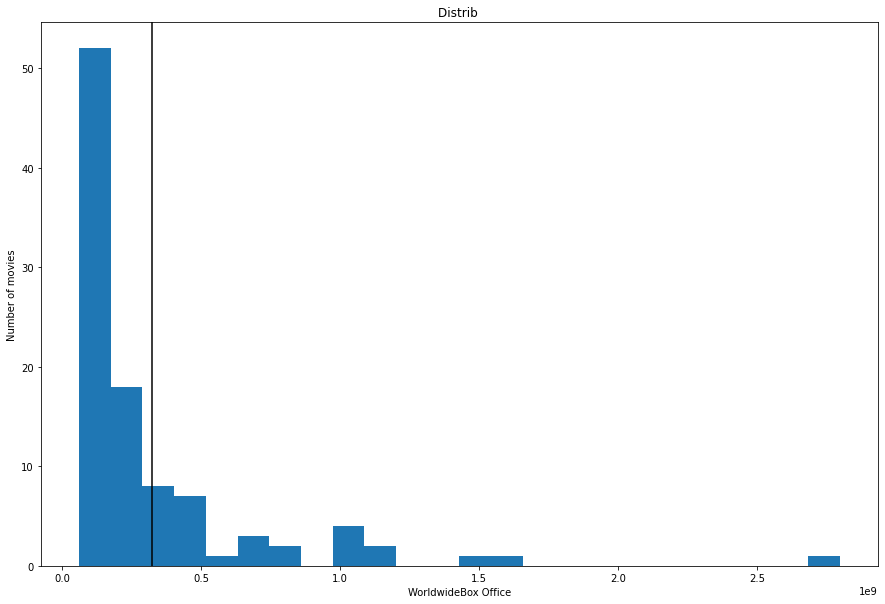

In [12]:
# Starting with taking a look at world wide box office:

def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = df['WorldwideBox Office']
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(15,10))
    # Plot histogram
    ax.hist(data, bins="auto")
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plot_histogram(
    table_string_df,
   "WorldwideBox Office",
    "Distrib ",
    "WorldwideBox Office",
    "Number of movies"
)

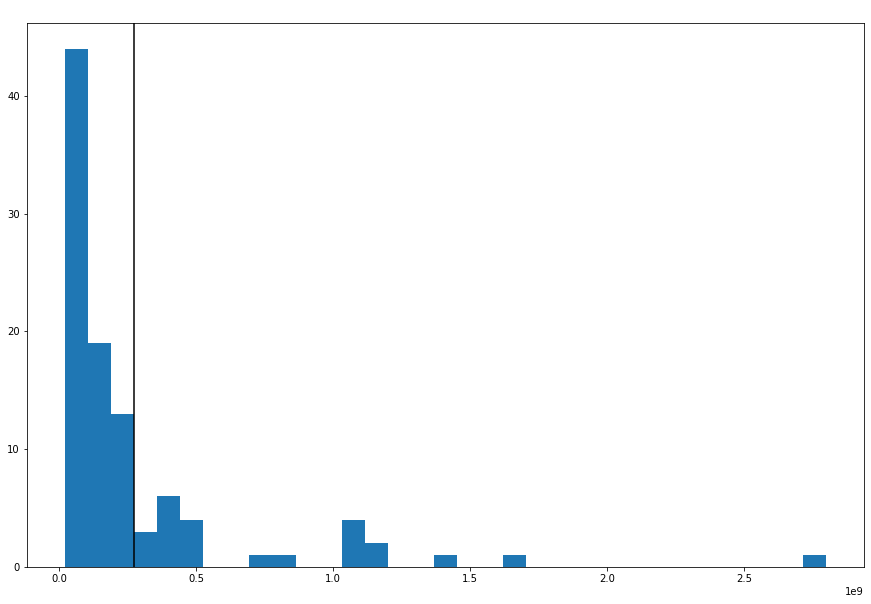

In [86]:
plot_histogram(
    table_string_df,
    "",
    " ",
    "",
    ""
)

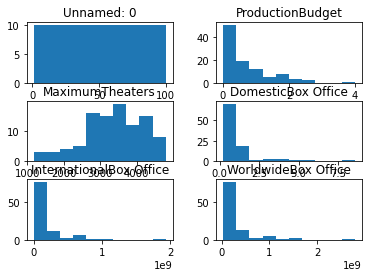

In [88]:
hist = table_string_df.hist(bins = 10, grid = False)

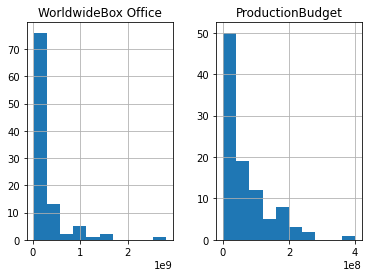

In [90]:
hist = table_string_df.hist(bins = 10, column = ['WorldwideBox Office', 'ProductionBudget'])

In [91]:
table_string_df.loc[0,:]

Unnamed: 0                                     1
Released                            Apr 26, 2019
Title                          Avengers: Endgame
Genre                                     Action
ProductionMethod           Animation/Live Action
CreativeType                          Super Hero
ProductionBudget                       400000000
MaximumTheaters                             4662
DomesticBox Office                     858373000
InternationalBox Office               1939427564
WorldwideBox Office                   2797800564
Name: 0, dtype: object

In [102]:
table_string_df.iloc

ValueError: Unable to coerce to Series, length must be 11: given 1